In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
RS = 7092022

In [2]:
df = pd.read_csv("Chocolate_data_final_cl.csv")

In [3]:
df.head()

,Unnamed: 0,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,1.0,NaN,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,0.0,NaN,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,0.0,NaN,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,1.0,NaN,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,1.0,NaN,Peru


In [4]:
df.isnull().sum()

Unnamed: 0                            0
Company (Maker-if known)              0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           888
Broad Bean Origin                     1
dtype: int64

In [5]:
df = df.drop(df.columns[[0]], axis=1)
df = df.drop('Specific Bean Origin or Bar Name', axis=1)
df = df.drop('Company (Maker-if known)', axis=1)
df = df.drop('Bean Type', axis=1)
df = df.drop('Broad Bean Origin', axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder(sparse=False)
encoded_state = ohe.fit_transform(df['Company Location'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,  
                   columns=['Company Location' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
df = df.drop('Company Location', axis=1)

In [7]:
df.head()

,REF,Review Date,Cocoa Percent,Rating,Company Location0,Company Location1,Company Location2,Company Location3,Company Location4,Company Location5,...,Company Location50,Company Location51,Company Location52,Company Location53,Company Location54,Company Location55,Company Location56,Company Location57,Company Location58,Company Location59
0,1876,2016,0.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1676,2015,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1676,2015,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1680,2015,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1704,2015,0.70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.dtypes

REF                     int64
Review Date             int64
Cocoa Percent         float64
Rating                float64
Company Location0     float64
                       ...   
Company Location55    float64
Company Location56    float64
Company Location57    float64
Company Location58    float64
Company Location59    float64
Length: 64, dtype: object

In [9]:
import itertools
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [10]:
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.3, random_state=RS)

In [11]:
sc_x = StandardScaler()
X_train_scalled = sc_x.fit_transform(X_train)
X_test_scalled = sc_x.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report

In [13]:
lr = LogisticRegression(random_state=RS)
lr.fit(X_train_scalled, y_train)

LogisticRegression(random_state=7092022)

Confusion matrix, without normalization
[[ 93 144]
 [ 69 233]]


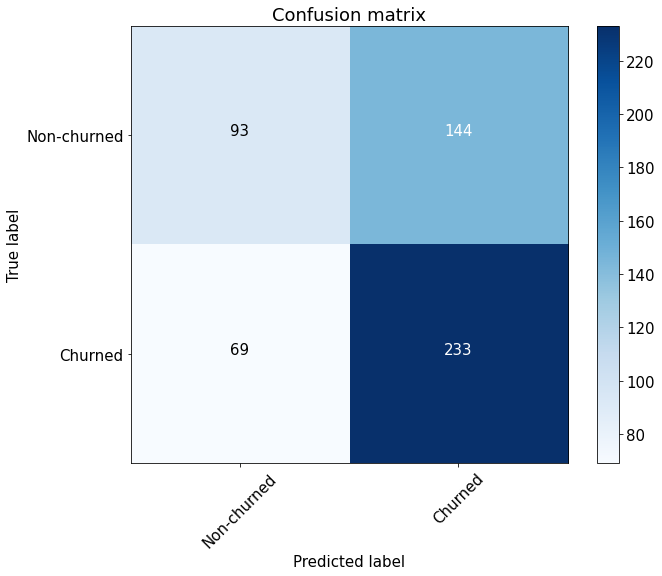

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show();

In [15]:
from pprint import pprint

In [16]:
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))

report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['Non-churned', 'Churned'])

print(report)

ROC_AUC 0.6167183614161567
              precision    recall  f1-score   support

 Non-churned       0.57      0.39      0.47       237
     Churned       0.62      0.77      0.69       302

    accuracy                           0.60       539
   macro avg       0.60      0.58      0.58       539
weighted avg       0.60      0.60      0.59       539



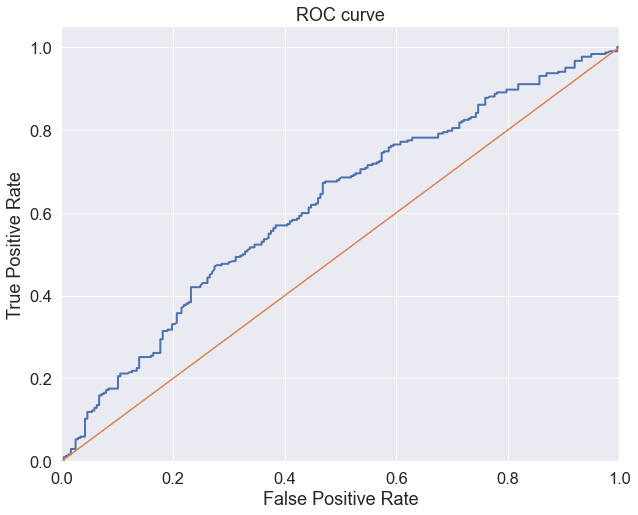

In [17]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [18]:
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))

report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['Non-churned', 'Churned'])

print(report)

ROC_AUC 0.6167183614161567
              precision    recall  f1-score   support

 Non-churned       0.57      0.39      0.47       237
     Churned       0.62      0.77      0.69       302

    accuracy                           0.60       539
   macro avg       0.60      0.58      0.58       539
weighted avg       0.60      0.60      0.59       539



In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=RS)
clf.fit(X_train_scalled, y_train)

DecisionTreeClassifier(random_state=7092022)

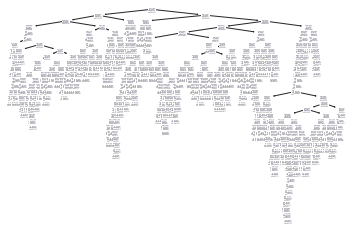

In [20]:
tree.plot_tree(clf);

C:\Users\User\AppData\Local\Temp\ipykernel_11404\3137058242.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Confusion matrix, without normalization
[[149  88]
 [108 194]]


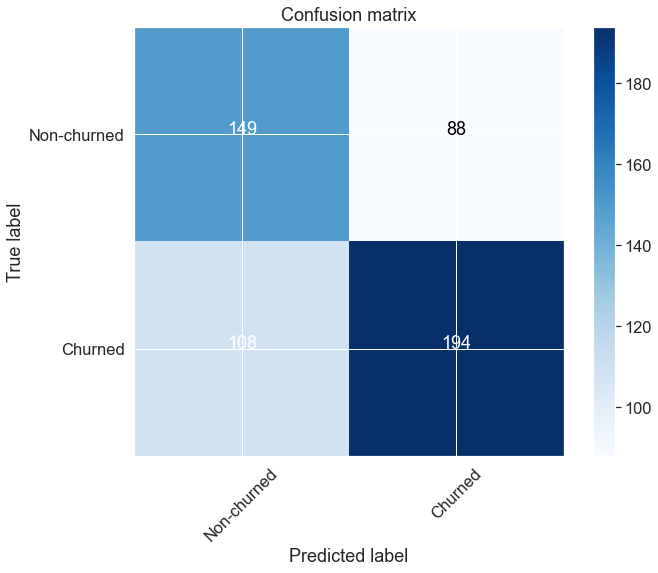

In [21]:
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')

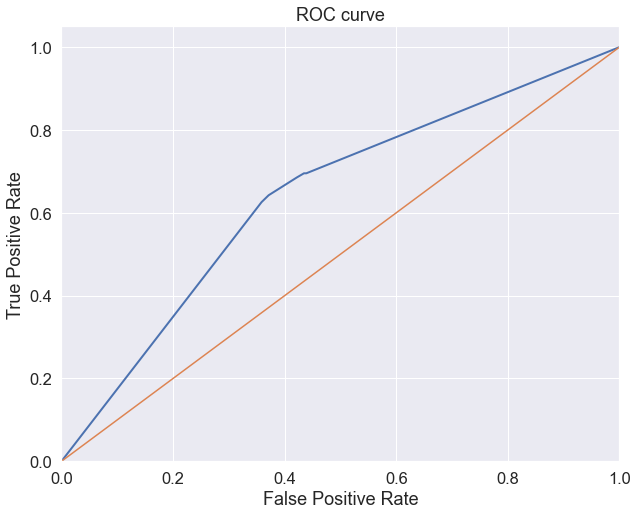

In [22]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [23]:
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))

report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['Non-churned', 'Churned'])

print(report)

ROC_AUC 0.6167183614161567
              precision    recall  f1-score   support

 Non-churned       0.57      0.39      0.47       237
     Churned       0.62      0.77      0.69       302

    accuracy                           0.60       539
   macro avg       0.60      0.58      0.58       539
weighted avg       0.60      0.60      0.59       539



C:\Users\User\AppData\Local\Temp\ipykernel_11404\3137058242.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Confusion matrix, without normalization
[[149  88]
 [ 96 206]]
ROC_AUC 0.70005169474949


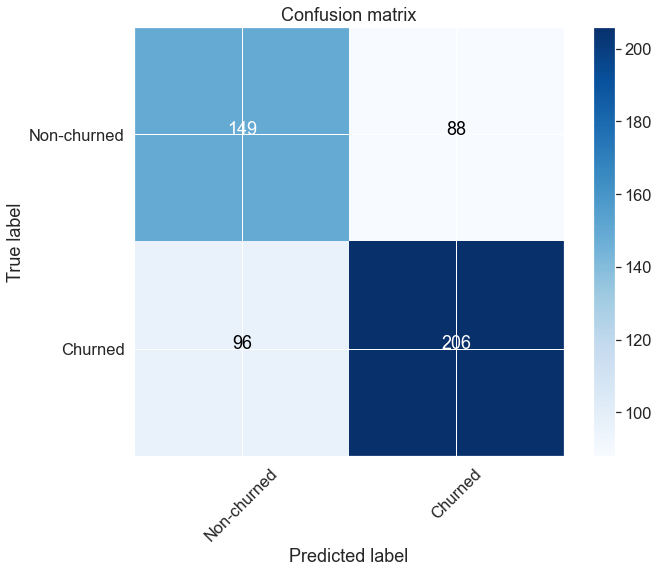

In [24]:
clf1 = RandomForestClassifier(random_state=RS) #, n_estimators=1000, min_samples_split=4, min_samples_leaf=2
clf1.fit(X_train_scalled, y_train)
cnf_matrix = confusion_matrix(y_test, clf1.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
print("ROC_AUC", roc_auc_score(y_test, clf1.predict_proba(X_test_scalled)[:,1]))

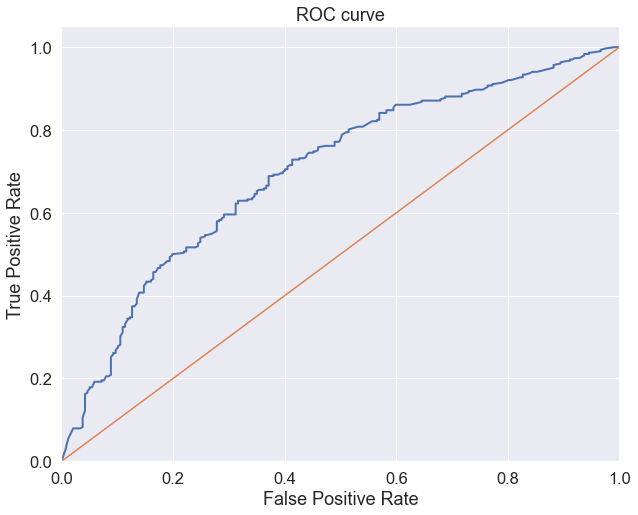

In [25]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf1.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [26]:
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))

report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['Non-churned', 'Churned'])

print(report)

ROC_AUC 0.6167183614161567
              precision    recall  f1-score   support

 Non-churned       0.57      0.39      0.47       237
     Churned       0.62      0.77      0.69       302

    accuracy                           0.60       539
   macro avg       0.60      0.58      0.58       539
weighted avg       0.60      0.60      0.59       539



C:\Users\User\AppData\Local\Temp\ipykernel_11404\3137058242.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


Confusion matrix, without normalization
[[ 94 143]
 [ 55 247]]


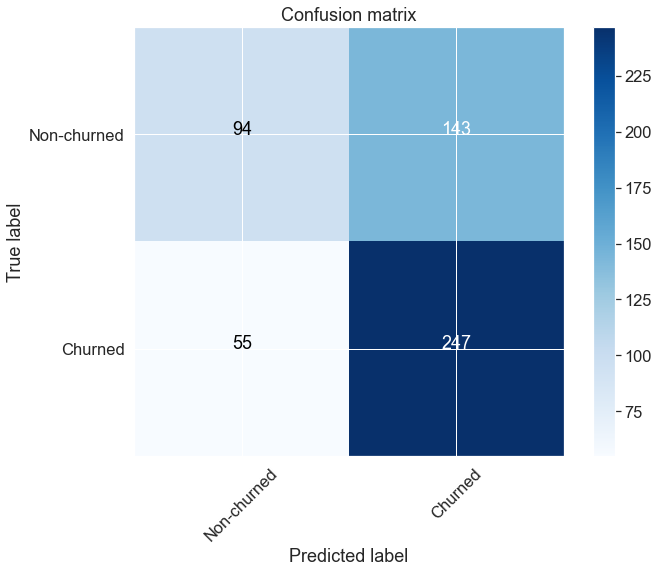

In [27]:
clf2 = GradientBoostingClassifier(random_state=RS)
clf2.fit(X_train_scalled, y_train)
cnf_matrix = confusion_matrix(y_test, clf2.predict(X_test_scalled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')

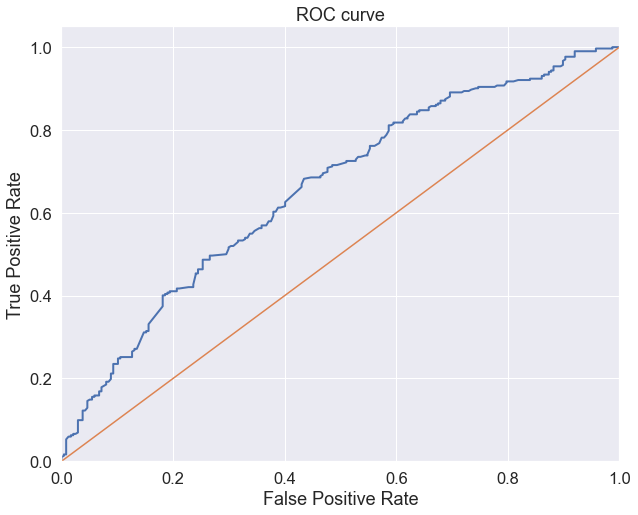

In [28]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf2.predict_proba(X_test_scalled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [29]:
print("ROC_AUC", roc_auc_score(y_test, lr.predict_proba(X_test_scalled)[:,1]))

report = classification_report(y_test, lr.predict(X_test_scalled),\
                                            target_names=['Non-churned', 'Churned'])

print(report)

ROC_AUC 0.6167183614161567
              precision    recall  f1-score   support

 Non-churned       0.57      0.39      0.47       237
     Churned       0.62      0.77      0.69       302

    accuracy                           0.60       539
   macro avg       0.60      0.58      0.58       539
weighted avg       0.60      0.60      0.59       539

